# 🫀 Heart Disease Dataset

### 데이터 설명
이 심장 질환 데이터 세트는 이미 독립적으로 사용 가능하지만 이전에는 결합되지 않은 5개의 인기 심장 질환 데이터 세트를 결합하여 선별되었습니다. 이 데이터 세트에는 5개의 심장 데이터 세트가 11개의 공통 기능과 결합되어 있어 지금까지 연구 목적으로 사용할 수 있는 심장 질환 데이터 세트 중 가장 큰 것입니다. 큐레이션에 사용되는 5개의 데이터 세트는 다음과 같습니다.  
  
- 클리블랜드
- 헝가리 인
- 스위스
- 롱비치 버지니아
- Statlog(심장) 데이터 세트.
  
이 데이터 세트는 11가지 기능을 갖춘 1,190개의 인스턴스로 구성됩니다. 이러한 데이터 세트는 CAD 관련 기계 학습 및 데이터 마이닝 알고리즘에 대한 고급 연구를 돕고 궁극적으로 임상 진단 및 조기 치료를 발전시키기 위해 한곳에 수집 및 결합되었습니다.  
  
  

### 데이터 정보
#### Attribute & Description   
- Sex 
    - 1 = male, 0= female; 
- Chest Pain Type
    - Value 1: typical angina  
    - Value 2: atypical angina  
    - Value 3: non-anginal pain  
    - Value 4: asymptomatic  
- Fasting Blood sugar
    - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
- Resting electrocardiogram results|    
    - Value 0: normal  
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
- Exercise induced angina
    - 1 = yes; 0 = no  
- the slope of the peak exercise ST segment    
    - Value 1: upsloping  
    - Value 2: flat  
    - Value 3: downsloping  
- class 
    - 1 = heart disease, 0 = Normal  
 
 


## import

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import shap


## 데이터 로드

In [2]:
df = pd.read_csv("archive/heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## EDA

In [3]:
np.random.seed(42)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
df.duplicated().sum()

272

In [7]:
df.loc[df[df.duplicated(keep=False)].index]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
90,49,0,2,110,208,0,0,160,0,0.0,1,0
163,49,0,2,110,208,0,0,160,0,0.0,1,0
556,58,1,3,150,219,0,1,118,1,0.0,2,1
604,58,1,3,150,219,0,1,118,1,0.0,2,1
617,70,1,4,130,322,0,2,109,0,2.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [8]:
df.loc[df[df.duplicated()].index] # 데이터 확장을 위한 중복 데이터인지 아니면 지를 확실하게 알 수 가 없다. 일단 두 개로 나누어서 성능 비교 후 

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


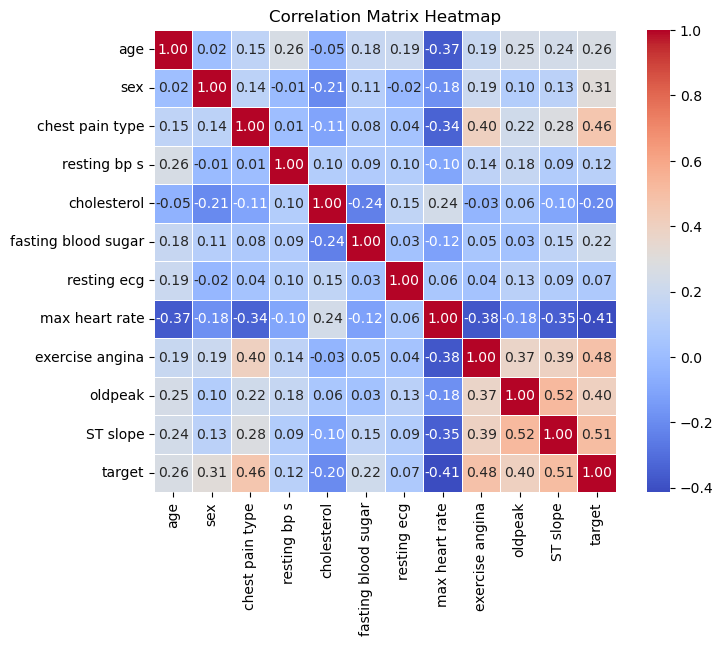

In [9]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
# 중복값을 삭제하지 않은 값
df_nodd = df.copy()

In [11]:
# 원본 데이터는 중복값을 지운 것을 사용
df = df.drop_duplicates(keep='first', ignore_index=True)
df.duplicated().sum()

0

In [12]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [13]:
df.tail(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
908,63,1,4,140,187,0,2,144,1,4.0,1,1
909,63,0,4,124,197,0,0,136,1,0.0,2,1
910,41,1,2,120,157,0,0,182,0,0.0,1,0
911,59,1,4,164,176,1,2,90,0,1.0,2,1
912,57,0,4,140,241,0,0,123,1,0.2,2,1
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1
917,38,1,3,138,175,0,0,173,0,0.0,1,0


max :  77 | min :  28
평균 값 :  53.51


Text(0.5, 0, 'age')

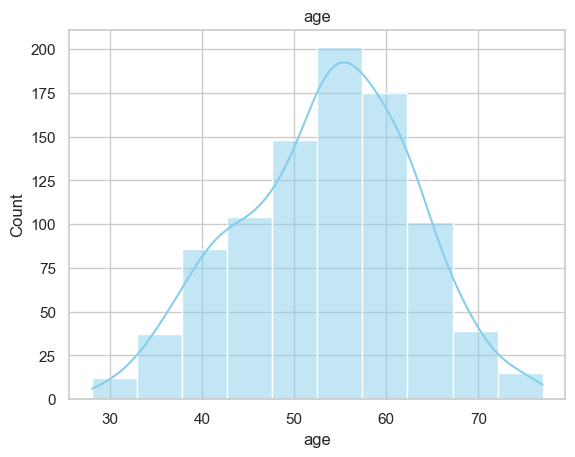

In [14]:
# age 데이터 값의 이상치 확인
print("max : " , df.age.max() , "| min : " , df.age.min())
print("평균 값 : ", df.age.mean().round(2))
sns.set(style="whitegrid")
sns.histplot(df["age"], kde=True, color="skyblue", bins=10)
plt.title("age")
plt.xlabel("age")

In [15]:
def checkOutlier(data, col, bin=30):
    print("Max : ", data[col].max(), "| Min : ", data[col].min())
    print("Mean : ", data[col].mean())
    print("Std : ", data[col].std())
    sns.set(style="whitegrid")
    sns.histplot(data[col], kde=True, color="skyblue", bins=bin)

Max :  77 | Min :  28
Mean :  53.510893246187365
Std :  9.432616506732007


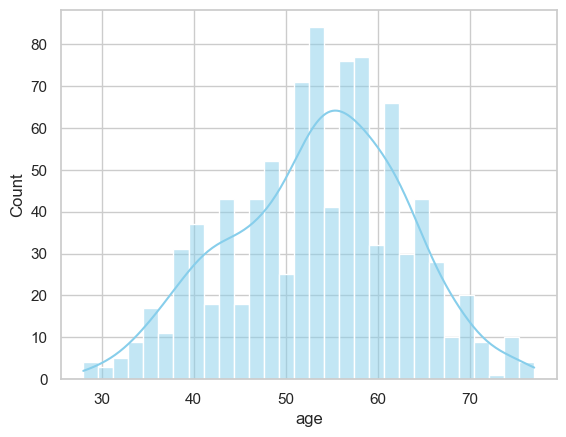

In [16]:
checkOutlier(df,"age")

sex
1    725
0    193
Name: count, dtype: int64
sex
1    0.79
0    0.21
Name: proportion, dtype: float64


<Axes: xlabel='sex'>

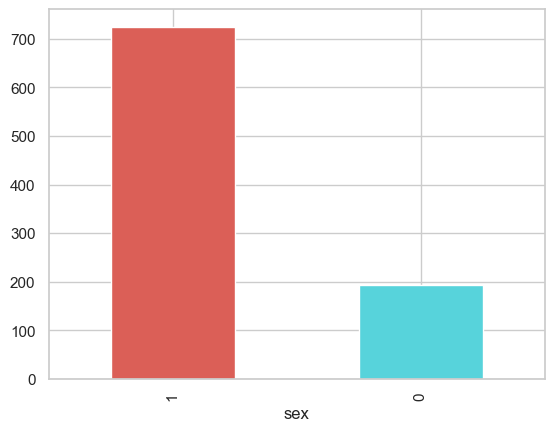

In [17]:
# sex 데이터 값 확인
print(df.sex.value_counts())
print(df.sex.value_counts(normalize=True).round(2))
colors = sns.color_palette('hls',2)
# 1 = male, 0= female;
df.sex.value_counts().plot(kind="bar",color=colors)
# 성비가 불균형 적인 문제가 있다. 해당 비율을 고정적으로 하여 tain set과 text set을 나누어야 한다.

In [18]:
# Chest Pain Type
""" 
    - Value 1: typical angina  협심증
    - Value 2: atypical angina  비전형적인 협심증
    - Value 3: non-anginal pain  비협심증성 통증
    - Value 4: asymptomatic 무증상
"""
df["chest pain type"].value_counts()

chest pain type
4    496
3    203
2    173
1     46
Name: count, dtype: int64

Max :  200 | Min :  0
Mean :  132.39651416122004
Std :  18.514154119907808


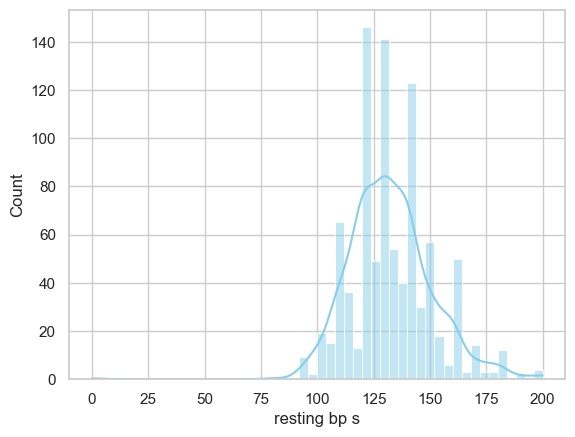

In [19]:
# resting bp s
checkOutlier(df, "resting bp s", 50)

In [20]:
df[df["resting bp s"] <= 60] # 인간의 혈압이 0인 경우는 죽은 사람에 경우 이다. 해당 데이터는 그 외에도 0인 것이 많으로 삭제한다.

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
449,55,1,3,0,0,0,0,155,0,1.5,2,1


In [21]:
# 이상치 제거
df = df.drop(index=df[df["resting bp s"] <= 60].index, axis=0).reset_index(drop=True)
df[df["resting bp s"] <= 60]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


Max :  200 | Min :  80
Mean :  132.54089422028352
Std :  17.99974879939768


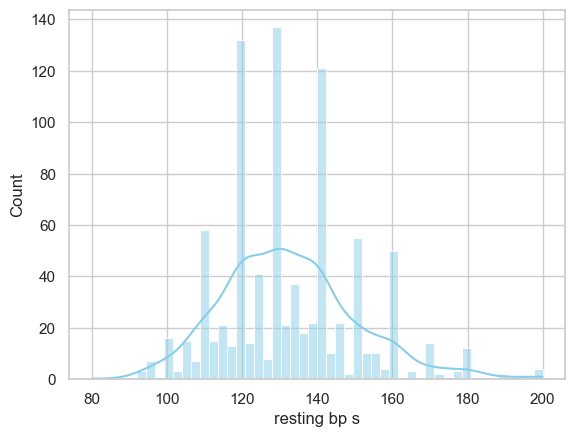

In [22]:
checkOutlier(df, "resting bp s", 50)

Max :  603 | Min :  0
Mean :  199.0163576881134
Std :  109.24633014048783


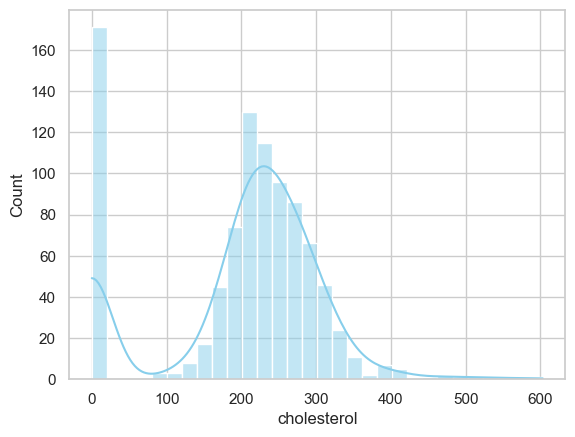

In [23]:
# cholesterol
checkOutlier(df,"cholesterol")

In [24]:
df[df["cholesterol"] < 99]["cholesterol"].value_counts()

cholesterol
0     171
85      1
Name: count, dtype: int64

In [25]:
# 데이터가 생각보다 많으며 만약 다른 데이터와 연관관계 분석 후 해당 데이터를 지우거나 평균값을 데체하여 수정한다.
df[df["cholesterol"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
293,65,1,4,115,0,0,0,93,1,0.0,2,1
294,32,1,1,95,0,1,0,127,0,0.7,1,1
295,61,1,4,105,0,1,0,110,1,1.5,1,1
296,50,1,4,145,0,1,0,139,1,0.7,2,1
297,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,1,4,122,0,0,0,120,0,0.5,1,1
514,63,1,3,130,0,1,1,160,0,3.0,2,0
517,48,1,3,102,0,1,1,110,1,1.0,3,1
534,56,1,4,130,0,0,2,122,1,1.0,2,1


fasting blood sugar
0    703
1    214
Name: count, dtype: int64


<Axes: xlabel='fasting blood sugar'>

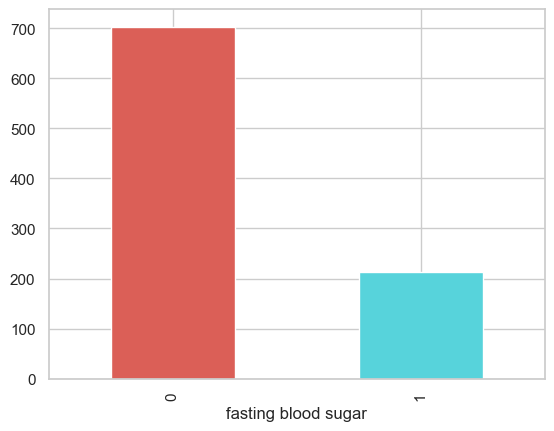

In [26]:
# fasting blood sugar
print(df["fasting blood sugar"].value_counts())
df["fasting blood sugar"].value_counts().plot(kind="bar",color=colors)
# (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 1 => 당뇨 환자

resting ecg
0    551
2    188
1    178
Name: count, dtype: int64


<Axes: xlabel='resting ecg'>

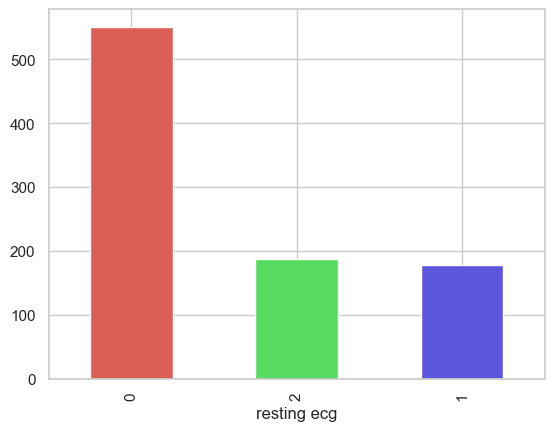

In [27]:
# resting ecg
"""
Value 0: normal  
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
"""
print(df["resting ecg"].value_counts())
colors = sns.color_palette('hls',3)
df["resting ecg"].value_counts().plot(kind="bar",color=colors)


Max :  202 | Min :  60
Mean :  136.78953107960743
Std :  25.467128815541507


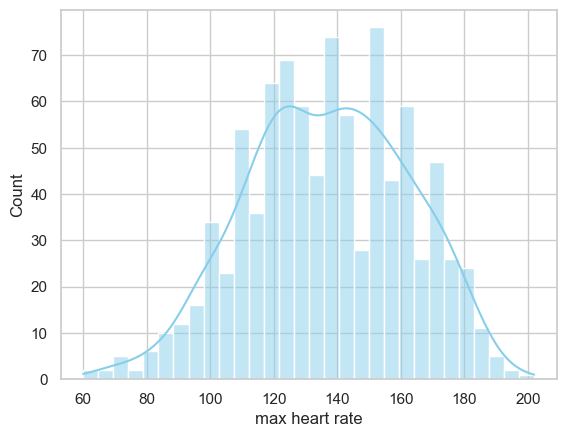

In [28]:
# max heart rate
checkOutlier(df,"max heart rate")

exercise angina
0    546
1    371
Name: count, dtype: int64


<Axes: xlabel='exercise angina'>

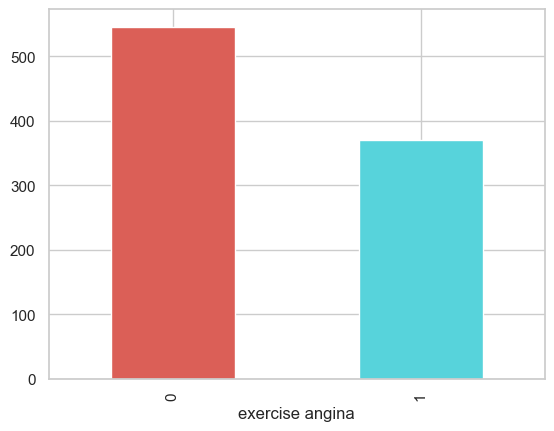

In [29]:
# exercise angina 운동 유발성 협심증
# 1 = yes; 0 = no
""" 
"운동 유발성 협심증"은 심장에 충분한 산소가 공급되지 않을 때 발생하는 흉통(가슴 통증)의 일종입니다. 운동이나 심한 신체 활동 동안 심장은 더 많은 산소를 필요로 하기 때문에, 혈관이 좁아져 있거나 막혀 있으면 적절한 양의 혈액이 심장으로 흘러 들어가지 못해 통증을 유발합니다.

운동 유발성 협심증의 주요 특징:
통증의 성격: 일반적으로 가슴 중앙에 불편함이나 압박감, 답답함, 무거움 등의 형태로 느껴집니다.
통증의 위치: 통증은 가슴뿐만 아니라 목, 턱, 어깨, 등 또는 팔로 퍼질 수 있습니다.
발생 시기: 주로 신체 활동 중에 발생하며, 활동을 멈추면 통증이 사라지는 경향이 있습니다.
기타 증상: 호흡곤란, 식은땀, 메스꺼움 등이 동반될 수 있습니다.

진단 및 관리
진단: 운동부하 검사, 관상동맥 조영술, 심장 초음파 등을 통해 진단할 수 있습니다.
관리: 생활 습관의 변경, 약물 치료, 때로는 관상동맥 개입술이나 우회 수술이 필요할 수 있습니다.
운동 유발성 협심증은 심혈관 질환의 경고 신호로 볼 수 있으므로, 이 증상이 나타나면 즉시 의학적 조언을 구하는 것이 중요합니다. 이는 심장에 지속적인 손상을 방지하고, 더 심각한 심장 사건을 예방할 수 있도록 도와줍니다.
"""

print(df["exercise angina"].value_counts())
colors = sns.color_palette('hls',2)
df["exercise angina"].value_counts().plot(kind="bar",color=colors)

Max :  6.2 | Min :  -2.6
Mean :  0.8866957470010904
Std :  1.0669599756520682


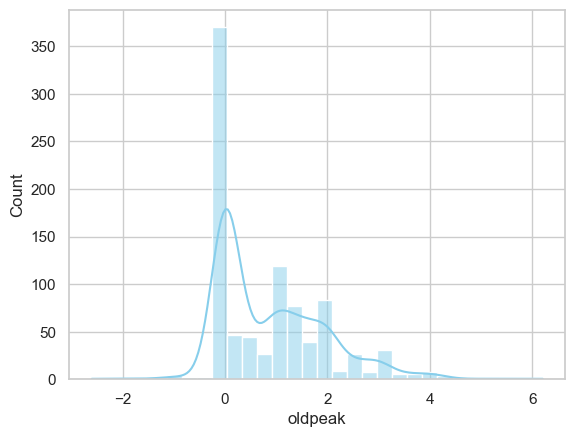

In [30]:
# oldpeak
checkOutlier(df,"oldpeak")

In [31]:
df[df["oldpeak"] < 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
321,63,1,4,100,0,1,0,109,0,-0.9,2,1
324,46,1,4,100,0,1,1,133,0,-2.6,2,1
325,42,1,4,105,0,1,0,128,1,-1.5,3,1
326,45,1,3,110,0,0,0,138,0,-0.1,1,0
331,56,1,4,115,0,1,1,82,0,-1.0,1,1
332,38,1,3,100,0,0,0,179,0,-1.1,1,0
334,51,1,4,130,0,1,0,170,0,-0.7,1,1
335,62,1,1,120,0,1,2,134,0,-0.8,2,1
352,56,1,4,120,0,0,1,100,1,-1.0,3,1
407,62,1,4,115,0,1,0,72,1,-0.5,2,1


ST slope
2    458
1    395
3     63
0      1
Name: count, dtype: int64


<Axes: xlabel='ST slope'>

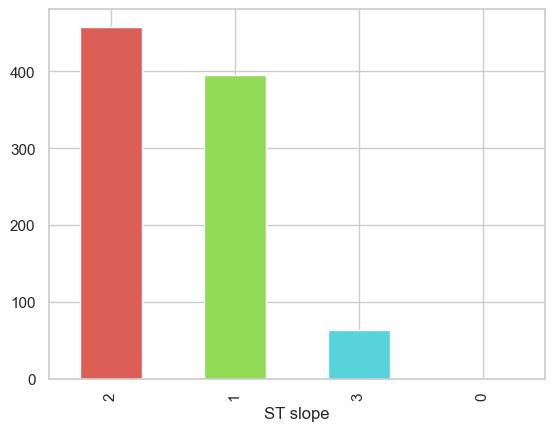

In [32]:
# ST slope
""" 
Value 1: upsloping  
Value 2: flat  
Value 3: downsloping  
"""
print(df["ST slope"].value_counts())
colors = sns.color_palette('hls',4)
df["ST slope"].value_counts().plot(kind="bar",color=colors)

In [33]:
# 목록에 없는 데이터를 가지고 있어 삭제함
df[df["ST slope"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
515,68,1,3,150,195,1,0,132,0,0.0,0,1


In [34]:
df = df.drop(index=df[df["ST slope"] == 0].index, axis=0).reset_index(drop=True)
df[df["ST slope"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


target
1    506
0    410
Name: count, dtype: int64
target
1    0.552402
0    0.447598
Name: proportion, dtype: float64


<Axes: xlabel='target'>

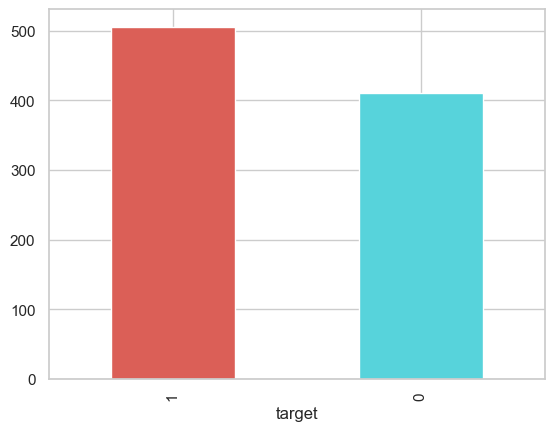

In [35]:
# target
print(df["target"].value_counts())
print(df["target"].value_counts(normalize=True))
colors = sns.color_palette('hls',2)
df["target"].value_counts().plot(kind="bar",color=colors)
# target 비율은 동일하므로 현 비율을 유지하면서 

## 데이터가 없는 이상치 문제
- 해결 방법
    1. 그대로 사용
    2. 평균값을 임의로 삽입
    3. 데이터를 삭제하고 사용
- 2안 문제점
    - 평균 값으로 대체하면 평균 값이 급격하게 올라가는 문제가 생김 -> 데이터에 영향을 주는 것이 된다.
- 해결 방법
    - 평균 값은 유지되고 target 비율에 맞게 데이터를 넣는다.
    - target 비율을 유지하면서 인덱스를 3개의 그룹으로 나눈다. -> 나중에 머신러닝 학습 시 학습 데이터 나누는 것을 생각해서
    - 정규 분포 값을 3개의 그룹에 인덱스에 무작위 대흥을 시킨다.
    - 데이터프레임에는 apply을 이용해 인덱스에 값을 가져와서 넣는다.
- 지적점
    - 무작위로 데이터를 집어 넣는 것은 위험하지 않는가?
        - 해당 컬럼은 다른 컬럼들과의 상관관계가 낮음으로 최대한 평균과 target 데이터의 비율에 최대한 영향을 주지 않는 만큼으로 데이터를 조정
        - 최대한 랜덤성을 부여한다.
        

In [36]:
df[df["cholesterol"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
293,65,1,4,115,0,0,0,93,1,0.0,2,1
294,32,1,1,95,0,1,0,127,0,0.7,1,1
295,61,1,4,105,0,1,0,110,1,1.5,1,1
296,50,1,4,145,0,1,0,139,1,0.7,2,1
297,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,1,4,122,0,0,0,120,0,0.5,1,1
514,63,1,3,130,0,1,1,160,0,3.0,2,0
516,48,1,3,102,0,1,1,110,1,1.0,3,1
533,56,1,4,130,0,0,2,122,1,1.0,2,1


In [37]:
df_chol = df.copy() # 그대로 사용
df_nochol = df.drop(index=df[df["cholesterol"] == 0].index, axis=0).reset_index(drop=True) # 해당 데이터 삭제

Max :  603 | Min :  0
Mean :  199.0207423580786
Std :  109.30593055516376


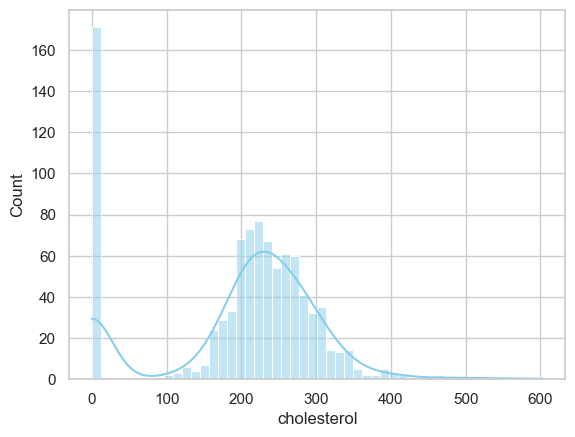

In [38]:
checkOutlier(df_chol, "cholesterol", 50)

Max :  603 | Min :  85
Mean :  244.7020134228188
Std :  59.165248888585


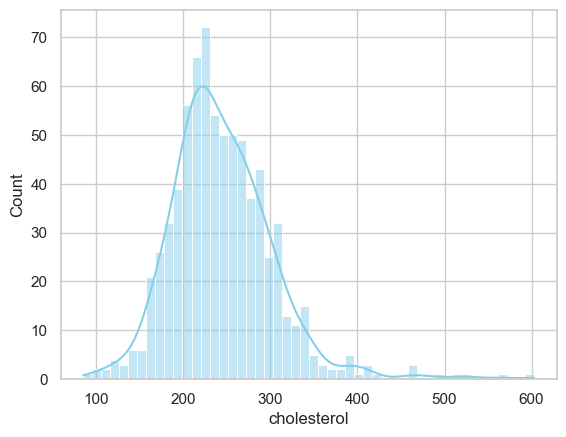

In [39]:
checkOutlier(df_nochol, "cholesterol", 50)

Max :  603 | Min :  85
Mean :  236.1703056768559
Std :  56.24769024828602


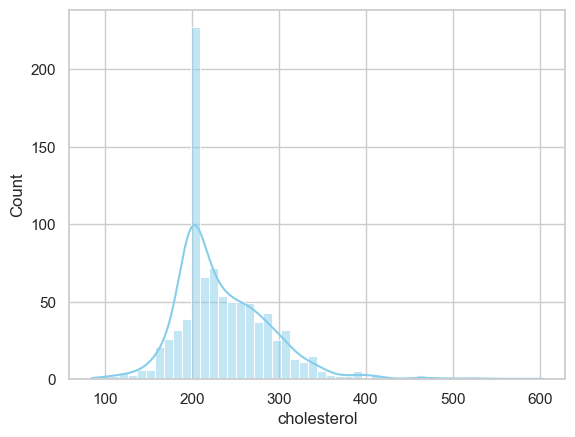

In [40]:
df_mean = df.copy()
cholemean= int(df_mean["cholesterol"].mean())
df_mean["cholesterol"] = df_mean["cholesterol"].apply(lambda x: cholemean if x == 0 else x)
checkOutlier(df_mean,"cholesterol",50)

In [41]:
df[df["cholesterol"]==0]["target"].value_counts()

target
1    151
0     20
Name: count, dtype: int64

Max :  603 | Min :  85
Mean :  235.0174672489083
Std :  68.80163710503005


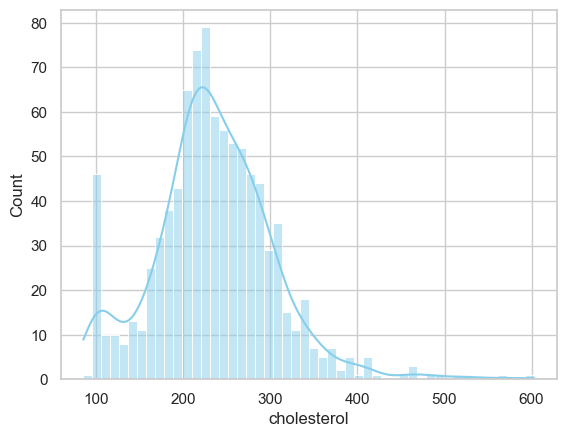

In [42]:
df_pre = df.copy() # 평균, 표준편차, 타겟 비율에 의한 값

class_stats = df.groupby('target')['cholesterol'].agg(['mean', 'std'])

def replace_outlier(row, stats):
    if row['cholesterol'] == 0:
        mean = stats.loc[row['target'], 'mean']
        std = stats.loc[row['target'], 'std']
        return int(np.clip(np.random.normal(mean, std), 100, 500))
    else:
        return int(row['cholesterol'])

df_pre["cholesterol"] = df_pre.apply(replace_outlier, args=(class_stats,), axis=1)

checkOutlier(df_pre, "cholesterol", 50)

## 모델 학습
### 데이터 분류 
데이터 이상치 처리 과정에서 3개의 데이터프레임 유형이 나왔다. 이 프로젝트에서 이상치 처리에서 좀 더 이상적인 것이 무엇지에 대해서 알아보기 위해 3개의 데이터프레임 모두 사용하여 데이터를 학습시켜서 학습률을 비교할 생각이다.

In [43]:
def splitTrainTestVal(data, target):
    print("DataFrame Shape : " , data.shape)
    Y = data[target]
    X = data.drop(columns=[target], axis=1)
    x, x_test, y, y_test = train_test_split(X, Y , test_size = 0.25, random_state = 42, stratify = Y)
    x_train, x_val, y_train, y_val = train_test_split(x, y , test_size = 0.25, random_state = 42, stratify = y)

    print("Train Shape :  X =", x_train.shape, "Y =", y_train.shape)
    print("Val Shape :  X =", x_val.shape, "Y =", y_val.shape)
    print("Test Shape :  X =", x_test.shape, "Y =", y_test.shape)

    # x train, val, test -> y train, val, test
    return x_train, x_val, x_test, y_train, y_val, y_test

In [44]:
# 데이터 이상치 제거하지 않은 것
df_chol.head(10)

xc_tain, xc_val, xc_teat, yc_tain, yc_val, yc_test = splitTrainTestVal(df_chol,"target")

DataFrame Shape :  (916, 12)
Train Shape :  X = (515, 11) Y = (515,)
Val Shape :  X = (172, 11) Y = (172,)
Test Shape :  X = (229, 11) Y = (229,)


In [45]:
# 데이터 이상치 제거한 것
df_nochol.head(10)

xn_tain, xn_val, xn_teat, yn_tain, yn_val , yn_test = splitTrainTestVal(df_nochol,"target")

DataFrame Shape :  (745, 12)
Train Shape :  X = (418, 11) Y = (418,)
Val Shape :  X = (140, 11) Y = (140,)
Test Shape :  X = (187, 11) Y = (187,)


In [46]:
# 평균과 표준편차, 타겟 비율을 고려하여 이상치를 대체한 것
df_pre.head(10)

xp_tain, xp_val, xp_teat, yp_tain, yp_val , yp_test = splitTrainTestVal(df_pre,"target")

DataFrame Shape :  (916, 12)
Train Shape :  X = (515, 11) Y = (515,)
Val Shape :  X = (172, 11) Y = (172,)
Test Shape :  X = (229, 11) Y = (229,)


In [47]:
# 평균으로 이상치 대체한 것
df_mean

xm_tain, xm_val, xm_teat, ym_tain, ym_val, ym_test = splitTrainTestVal(df_mean,"target")

DataFrame Shape :  (916, 12)
Train Shape :  X = (515, 11) Y = (515,)
Val Shape :  X = (172, 11) Y = (172,)
Test Shape :  X = (229, 11) Y = (229,)


### 데이터 모델 학습

In [48]:
# 기준 모델 제작
base_c = yc_tain.mode()[0]
base_n = yn_tain.mode()[0]
base_p = yp_tain.mode()[0]
base_m = ym_tain.mode()[0]

baseline_c = len(yc_tain) * [base_c] 
baseline_n = len(yn_tain) * [base_n]
baseline_p = len(yp_tain) * [base_p]
baseline_m = len(ym_tain) * [base_m]

baseline_acc_c = accuracy_score(yc_tain, baseline_c)
baseline_acc_n = accuracy_score(yn_tain, baseline_n)
baseline_acc_p = accuracy_score(yp_tain, baseline_p)
baseline_acc_m = accuracy_score(ym_tain, baseline_m)

In [49]:
print(f'기준모델의 정확도는 {baseline_acc_c.round(3)} 입니다')
print(classification_report(yc_tain, baseline_c))

기준모델의 정확도는 0.553 입니다
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.55      1.00      0.71       285

    accuracy                           0.55       515
   macro avg       0.28      0.50      0.36       515
weighted avg       0.31      0.55      0.39       515



In [50]:
print(f'기준모델의 정확도는 {baseline_acc_n.round(3)} 입니다')
print(classification_report(yn_tain, baseline_n))

기준모델의 정확도는 0.524 입니다
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       219
           1       0.00      0.00      0.00       199

    accuracy                           0.52       418
   macro avg       0.26      0.50      0.34       418
weighted avg       0.27      0.52      0.36       418



In [51]:
print(f'기준모델의 정확도는 {baseline_acc_p.round(3)} 입니다')
print(classification_report(yp_tain, baseline_p))

기준모델의 정확도는 0.553 입니다
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.55      1.00      0.71       285

    accuracy                           0.55       515
   macro avg       0.28      0.50      0.36       515
weighted avg       0.31      0.55      0.39       515



In [52]:
print(f'기준모델의 정확도는 {baseline_acc_m.round(3)} 입니다')
print(classification_report(ym_tain, baseline_m))

기준모델의 정확도는 0.553 입니다
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.55      1.00      0.71       285

    accuracy                           0.55       515
   macro avg       0.28      0.50      0.36       515
weighted avg       0.31      0.55      0.39       515



In [56]:
# 로지스틱 회귀
logistic_model = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=100)
logistic_model.fit(xc_tain, yc_tain)
log_pred_c = logistic_model.predict(xc_val)

print(confusion_matrix(yc_val, log_pred_c))
print(classification_report(yc_val, log_pred_c))

[[63 14]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        77
           1       0.86      0.92      0.89        95

    accuracy                           0.87       172
   macro avg       0.87      0.87      0.87       172
weighted avg       0.87      0.87      0.87       172



In [57]:
logistic_model2 = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=100)
logistic_model2.fit(xn_tain, yn_tain)
log_pred_n = logistic_model2.predict(xn_val)

print(confusion_matrix(yn_val, log_pred_n))
print(classification_report(yn_val, log_pred_n))

[[62 11]
 [11 56]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        73
           1       0.84      0.84      0.84        67

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



In [58]:
logistic_model3 = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=100)
logistic_model3.fit(xp_tain, yp_tain)
log_pred_p = logistic_model2.predict(xp_val)

print(confusion_matrix(yp_val, log_pred_p))
print(classification_report(yp_val, log_pred_p))

[[66 11]
 [10 85]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.89      0.89      0.89        95

    accuracy                           0.88       172
   macro avg       0.88      0.88      0.88       172
weighted avg       0.88      0.88      0.88       172



In [59]:
logistic_model4 = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=100)
logistic_model4.fit(xm_tain, ym_tain)
log_pred_m = logistic_model2.predict(xm_val)

print(confusion_matrix(ym_val, log_pred_m))
print(classification_report(ym_val, log_pred_m))

[[66 11]
 [ 9 86]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        77
           1       0.89      0.91      0.90        95

    accuracy                           0.88       172
   macro avg       0.88      0.88      0.88       172
weighted avg       0.88      0.88      0.88       172



In [ ]:
# 결정 트리
decision_tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)

In [ ]:
# 랜덤 포레스트
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

In [ ]:
# XGBoost
xgb_model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, subsample=0.8, colsample_bytree=1, objective='binary:logistic')